In [1]:
# Import necessary libraries for data processing, modeling, and visualization
# --- CatBoost for pdr (Classification) ---

# Import Libraries
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
# Load dataset and remove unnecessary column
df = pd.read_csv("dataset.csv")
df = df.drop(columns=['Unnamed: 0'])

# Define features (X) and target (y)
X = df.drop('pdr', axis=1)
y = df['pdr']

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = CatBoostClassifier(verbose=0, random_state=42)

In [4]:
# Train the model
model.fit(X_train, y_train)

# Predict on the test set
preds = model.predict(X_test)

In [5]:
# Evaluate
# Evaluate predictions using accuracy, confusion matrix, and classification report

acc = accuracy_score(y_test, preds)
cm = confusion_matrix(y_test, preds)

print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, preds))

Accuracy: 0.9883
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       477
           1       0.00      0.00      0.00         1
           3       0.67      0.67      0.67         3
           4       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         9
          16       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         5
          19       0.67      1.00      0.80         2
          20       0.00      0.00      0.00         1
          24       1.00      1.00      1.00         1
          27       1.00      1.00      1.00         1
          30       0.33      1.00      0.50         1
          31       0.67      0.40      0.50         5
          39       1.00      1.00      1.00         1
          42       0.00      0.00      0.00         0
          43       1.00      1.00      1.00         1
          49       1.00      0.50      0.67         2
          

C:\Users\User\anaconda3\envs\FA0111033\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\envs\FA0111033\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\envs\FA0111033\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Use

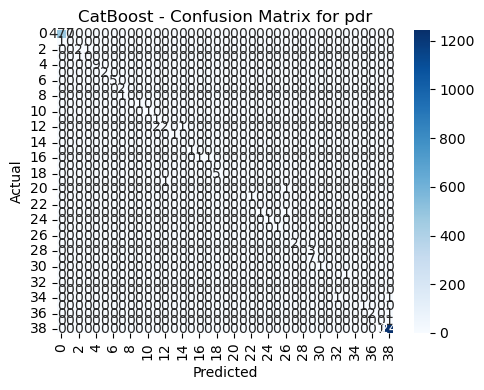

In [6]:
# Plot confusion matrix
# Calculate RMSE and R-squared evaluation metrics

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CatBoost - Confusion Matrix for pdr")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

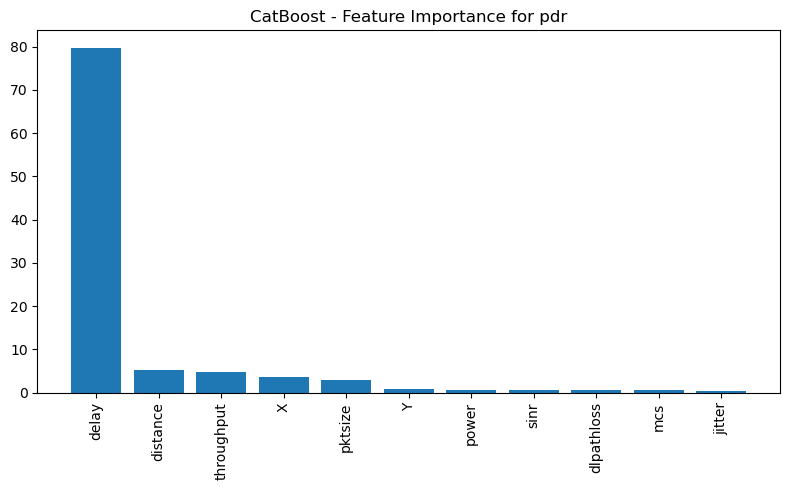

In [7]:
# Plot feature importance
importances = model.get_feature_importance()

# Sort features based on importance scores
indices = importances.argsort()[::-1]


# Plot the feature importance for better visualization
plt.figure(figsize=(8, 5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("CatBoost - Feature Importance for pdr")
plt.tight_layout()
plt.show()
